# Water Conservation Project
Group: Steven Chua, Yvonne Radsmikham, Stefan Thoss

This notebook uses Python 3.5.

In [1]:
# Import Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
%matplotlib inline

## Data Loading & Cleaning

In [2]:
# Load the dataset for supplier compliance and print the list of columns
# Data source: https://www.kaggle.com/calepa/water-conservation-supplier-compliance
sc = pd.read_csv('supplier_compliance.csv', skipinitialspace=True)
sc.columns

Index(['Supplier Name', 'Hydrologic Region',
       'State-mandated Conservation Standard - Previous (3/1/2016)',
       'State-mandated Conservation Standard - Current (Effective 6/1/2016)',
       'Did Supplier Self-certify?',
       'Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016',
       'June 2016 to Aug 2016 Self-certified?',
       'Applicable Cumulative Savings by Supplier (as compared to 2013)',
       'Missed Conservation Standard By', 'Order Status',
       'Monthly Savings (as compared to 2013) - Aug 2015',
       'Monthly Savings (as compared to 2013) - Aug 2016',
       'Estimated Aug 2016 Monthly R-GPCD', 'Total Population Served'],
      dtype='object')

In [3]:
# Convert the string columns which contain percentage values to float columns and
# print the data types of all columns
sc.iloc[:,[2,3,5,6,7,8,10,11]] = sc.iloc[:,[2,3,5,6,7,8,10,11]].replace('%','',regex=True).apply(pd.to_numeric)/100
sc.iloc[:,13] = sc.iloc[:,13].replace(',','',regex=True).apply(pd.to_numeric)
sc.dtypes

Supplier Name                                                                         object
Hydrologic Region                                                                     object
State-mandated Conservation Standard - Previous (3/1/2016)                           float64
State-mandated Conservation Standard - Current (Effective 6/1/2016)                  float64
Did Supplier Self-certify?                                                            object
Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016    float64
June 2016 to Aug 2016 Self-certified?                                                float64
Applicable Cumulative Savings by Supplier (as compared to 2013)                      float64
Missed Conservation Standard By                                                      float64
Order Status                                                                          object
Monthly Savings (as compared to 2013) - Aug 2015                      

In [4]:
# Check the prepared dataset
sc.head()

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
0,California City City of,South Lahontan,0.28,0.28,No,0.131,0.180,0.131,0.149,C,0.168,0.205,148.5,14120
1,Yucaipa Valley Water District,South Coast,0.34,0.20,Yes,0.183,0.071,0.071,0.129,NaN,0.264,0.119,260.0,45018
2,Sanger City of,Tulare Lake,0.26,0.26,No,0.173,0.124,0.173,0.087,NaN,0.380,0.172,181.1,25664
3,Adelanto City of,South Lahontan,0.16,0.16,No,0.093,-0.103,0.093,0.067,C,0.205,-0.306,125.5,29023
4,Red Bluff City of,Sacramento River,0.33,0.33,No,0.278,0.195,0.278,0.052,NaN,0.424,0.308,202.9,14076


In [5]:
# Calculate basic statistics like mean, median, etc. about the dataset
sc.describe(include = 'all')

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
count,389,389,389.000000,389.000000,389,389.000000,389.000000,389.000000,389.000000,7,389.000000,389.000000,389.000000,3.890000e+02
unique,389,10,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,Nipomo Community Services District,South Coast,NaN,NaN,Yes,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN
freq,1,171,NaN,NaN,361,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.217609,0.023136,NaN,0.242018,0.202856,0.204820,-0.181684,NaN,0.270414,0.180591,133.831877,9.065885e+04
std,NaN,NaN,0.079607,0.063861,NaN,0.068435,0.071208,0.070885,0.082255,NaN,0.089001,0.083947,68.239474,2.434458e+05
min,NaN,NaN,0.040000,0.000000,NaN,0.046000,-0.103000,-0.029000,-0.479000,NaN,-0.174000,-0.306000,35.400000,1.120000e+02
25%,NaN,NaN,0.160000,0.000000,NaN,0.199000,0.159000,0.160000,-0.227000,NaN,0.217000,0.137000,87.000000,2.049900e+04
50%,NaN,NaN,0.220000,0.000000,NaN,0.239000,0.201000,0.203000,-0.188000,NaN,0.274000,0.180000,118.300000,4.376700e+04
75%,NaN,NaN,0.280000,0.000000,NaN,0.281000,0.241000,0.243000,-0.144000,NaN,0.326000,0.223000,164.500000,9.120700e+04


## Data Exploration
In this section some basic exploration about the dataset is done.

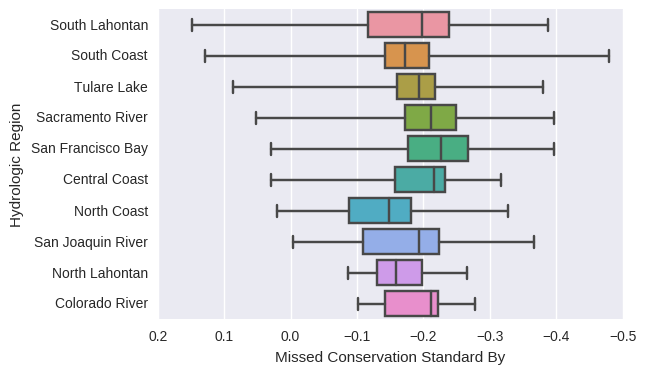

In [6]:
# Create boxplots with information on how much the conservation standard was missed for each hydrologic region
ax = sns.boxplot(x='Missed Conservation Standard By', y='Hydrologic Region', data=sc, whis=np.inf)
# Invert the x-axis since a negative value for missed conservation is a good thing (means that they overperformed)
ax.invert_xaxis()

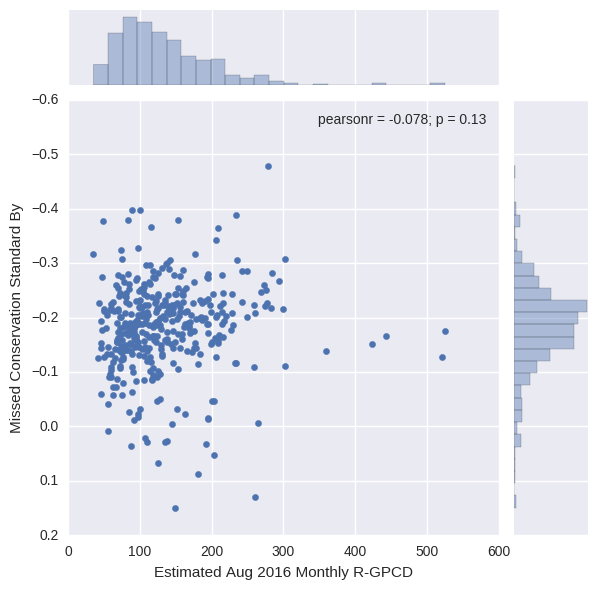

In [7]:
# Investigate whether suppliers that have a higher residential gallons per capita day are more
# likely to miss conservation standards with a scatterplot
g = sns.jointplot('Estimated Aug 2016 Monthly R-GPCD', 'Missed Conservation Standard By', data=sc, kind='scatter')
# Invert the y-axis since a negative value for missed conservation is a good thing (means that they overperformed)
g.fig.get_axes()[0].invert_yaxis()

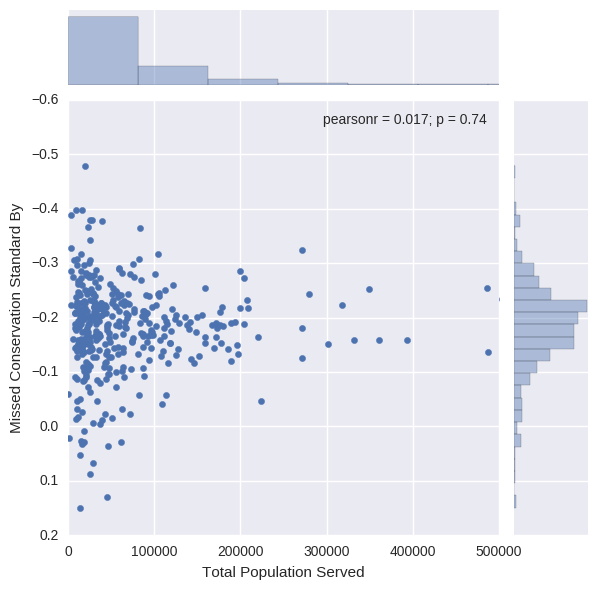

In [8]:
# Investigate whether suppliers that serve a larger population are more likely to miss
# conservation standards with a scatterplot (ignoring supplier with a population of more than 500,000 to
# improve readability of the graph)
g = sns.jointplot('Total Population Served', 'Missed Conservation Standard By', data=sc, kind='scatter', xlim=(0,500000))
# Invert the y-axis since a negative value for missed conservation is a good thing (means that they overperformed)
g.fig.get_axes()[0].invert_yaxis()

In [9]:
# Calculate the number of suppliers per region
sc.groupby('Hydrologic Region')['Hydrologic Region'].count()

Hydrologic Region
Central Coast         32
Colorado River        11
North Coast           14
North Lahontan         4
Sacramento River      41
San Francisco Bay     44
San Joaquin River     26
South Coast          171
South Lahontan        17
Tulare Lake           29
Name: Hydrologic Region, dtype: int64

## Underperforming Suppliers
Analysis done for non-self-certified suppliers that did non reach their conservation standards.

In [10]:
# Add a boolean column to the dataframe to identify underperforming suppliers
sc['Underperforming'] = sc['Missed Conservation Standard By'] > 0

In [11]:
# Calculate the 5 most underperforming suppliers per region
sc[sc['Underperforming'] & (sc['Did Supplier Self-certify?'] == 'No')].groupby('Hydrologic Region') \
  ['Supplier Name', 'Missed Conservation Standard By'].apply(lambda x: x.nlargest(5, 'Missed Conservation Standard By'))

Supplier Name  Missed Conservation Standard By
Hydrologic Region                                                             
Sacramento River  4        Red Bluff  City of                            0.052
South Coast       9         Fillmore  City of                            0.026
South Lahontan    0  California City  City of                            0.149
                  3          Adelanto City of                            0.067
Tulare Lake       2           Sanger  City of                            0.087
                  6      Bakman Water Company                            0.033

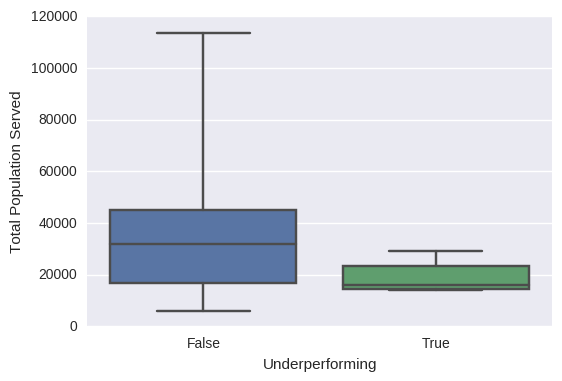

In [12]:
# Print boxplots for the total population served separated by performance
sns.boxplot(x='Underperforming', y='Total Population Served', whis=np.inf,
            data=sc[sc['Did Supplier Self-certify?'] == 'No'])

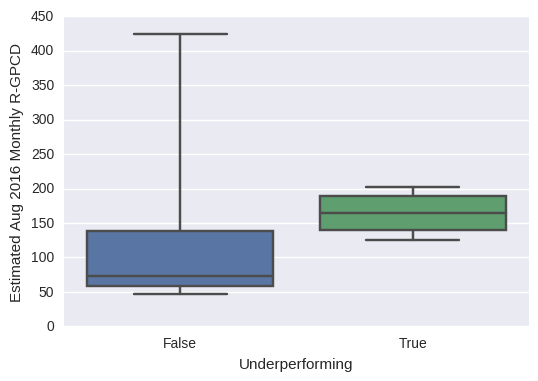

In [13]:
# Print boxplots for the residential gallons per capita day separated by performance
sns.boxplot(x='Underperforming', y='Estimated Aug 2016 Monthly R-GPCD', whis=np.inf,
            data=sc[sc['Did Supplier Self-certify?'] == 'No'])

## Self-certification
This analysis evaluates how self-certification influences the performance of suppliers.

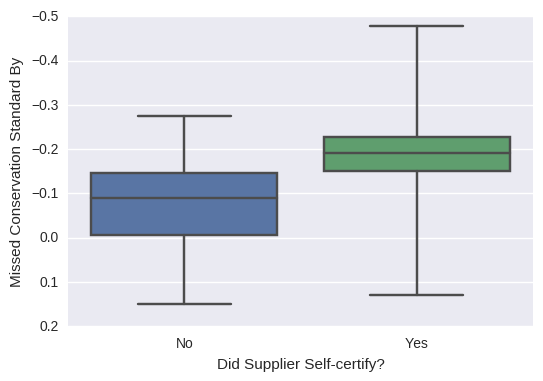

In [14]:
# Print boxplots for how much the conservation standard was missed separated by self-certification
ax = sns.boxplot(x='Did Supplier Self-certify?', y='Missed Conservation Standard By', data=sc, whis=np.inf)
# Invert the y-axis since a negative value for missed conservation is a good thing (means that they overperformed)
ax.invert_yaxis()

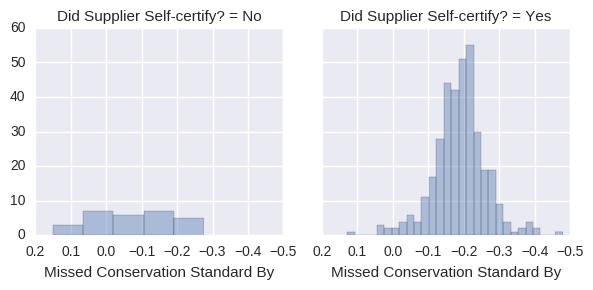

In [15]:
# Print histograms for how much the conservation standard was missed separated by self-certification
g = sns.FacetGrid(sc, col='Did Supplier Self-certify?')
g = g.map(sns.distplot, 'Missed Conservation Standard By', kde=False)
# Invert the x-axis since a negative value for missed conservation is a good thing (means that they overperformed)
g.fig.get_axes()[0].invert_xaxis()

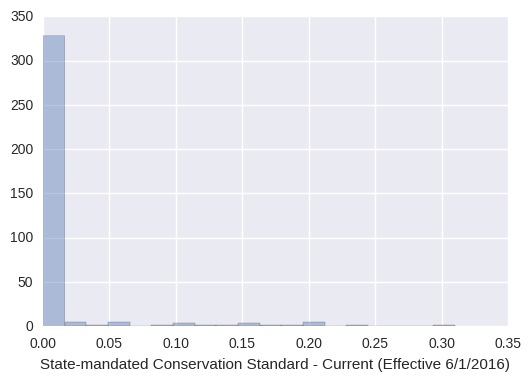

In [16]:
# Print histogram for conservation standard of the self-certified suppliers since based on the last graph
# it is suspected that they have a different standard
sns.distplot(sc.loc[sc['Did Supplier Self-certify?'] == 'Yes', 'State-mandated Conservation Standard - Current (Effective 6/1/2016)'], kde=False)

In [17]:
# Calculate percentage of self-certified suppliers that have a conservation standard of 0 since
# most suppliers are in the lowest bin of the prvious histogram
sc_count = sc[sc['Did Supplier Self-certify?'] == 'Yes'].shape[0]
sc_cons0_count = sc[(sc['Did Supplier Self-certify?'] == 'Yes') & \
                       (sc['State-mandated Conservation Standard - Current (Effective 6/1/2016)'] == 0)].shape[0]
(sc_cons0_count / sc_count)

0.9085872576177285

## Supplier Compliance
In this section we try to predict suppliers that will miss their conservation standard.

In [18]:
# First print the correlation table to check for feature correlations
corr = sc.corr()
corr.columns = ['S-M CS (3/1/2016)', 'S-M CS (6/1/2016)', 'Enforceable Cumulative %', 'Self-Certification', 'Applicable Cumulative %', 'Miss Conservation Standard', 'Monthly Savings (August 2015)', 'Monthly Savings (August 2016)', 'R-GPCD', 'Total Population', 'Underperforming']
corr.index = corr.columns
corr

,S-M CS (3/1/2016),S-M CS (6/1/2016),Enforceable Cumulative %,Self-Certification,Applicable Cumulative %,Miss Conservation Standard,Monthly Savings (August 2015),Monthly Savings (August 2016),R-GPCD,Total Population,Underperforming
S-M CS (3/1/2016),1.000000,0.119652,0.487124,0.284381,0.289372,-0.156477,0.416825,0.169345,0.751668,-0.135968,-0.000245
S-M CS (6/1/2016),0.119652,1.000000,0.146387,0.168168,0.258134,0.553928,0.104832,0.177243,0.104855,-0.071906,0.450452
Enforceable Cumulative %,0.487124,0.146387,1.000000,0.840911,0.851498,-0.620144,0.810566,0.658547,0.428711,-0.111819,-0.159714
Self-Certification,0.284381,0.168168,0.840911,1.000000,0.974463,-0.709202,0.614935,0.834198,0.156028,-0.075887,-0.238595
Applicable Cumulative %,0.289372,0.258134,0.851498,0.974463,1.000000,-0.661361,0.629863,0.793444,0.184813,-0.084115,-0.191916
Miss Conservation Standard,-0.156477,0.553928,-0.620144,-0.709202,-0.661361,1.000000,-0.461408,-0.546159,-0.077859,0.016662,0.515110
Monthly Savings (August 2015),0.416825,0.104832,0.810566,0.614935,0.629863,-0.461408,1.000000,0.585345,0.396457,-0.076487,-0.041810
Monthly Savings (August 2016),0.169345,0.177243,0.658547,0.834198,0.793444,-0.546159,0.585345,1.000000,0.023549,-0.043824,-0.132839
R-GPCD,0.751668,0.104855,0.428711,0.156028,0.184813,-0.077859,0.396457,0.023549,1.000000,-0.106280,0.030000
Total Population,-0.135968,-0.071906,-0.111819,-0.075887,-0.084115,0.016662,-0.076487,-0.043824,-0.106280,1.000000,-0.047846


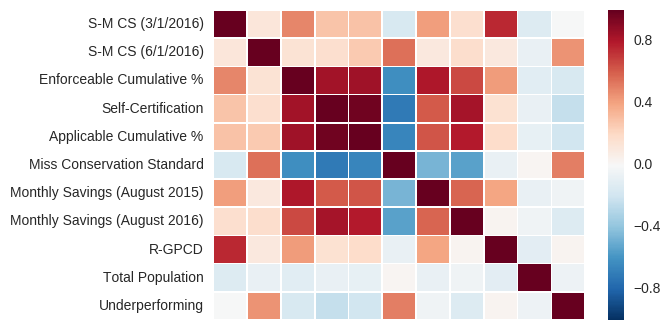

In [19]:
# Plot the correlation matrix from above
sns.heatmap(corr, annot=True, linewidths=0.5, xticklabels=False)

In [20]:
# Create 'Type' column with 0 = Fail, 1 = Pass as a label to predict the supplier compliance
sc['Type'] = sc['Missed Conservation Standard By'].map(lambda x: 0 if x > 0 else 1)

In [21]:
# Define training and test sets
np.random.seed(54321)
split = np.random.rand(len(sc)) < 0.75
train = sc[split]
test = sc[~split]

In [22]:
# Call Gaussian Naive Bayesian class with default parameters
clf = GaussianNB()

In [23]:
# Train model
clf.fit(train.iloc[:,12:14], train['Type'])

GaussianNB(priors=None)

In [24]:
# Prediction
prediction= clf.predict(test.iloc[:,12:14])
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [25]:
# Calculate Accuracy, F1 Score, Recall, and Precision Scores
print('Accuracy:', accuracy_score(test['Type'], prediction))
print('F1 Score:', f1_score(test['Type'], prediction, average= 'binary'))
print('Recall Score:', recall_score(test['Type'], prediction))
print('Precision Score:', precision_score(test['Type'], prediction))

Accuracy: 0.971962616822
F1 Score: 0.985781990521
Recall Score: 1.0
Precision Score: 0.971962616822


In [26]:
# Only use non-self-certified data for the following analysis
sc2 = sc.loc[sc['Did Supplier Self-certify?'] != 'Yes']
sc2.head()

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served,Underperforming,Type
0,California City City of,South Lahontan,0.28,0.28,No,0.131,0.180,0.131,0.149,C,0.168,0.205,148.5,14120,True,0
2,Sanger City of,Tulare Lake,0.26,0.26,No,0.173,0.124,0.173,0.087,NaN,0.380,0.172,181.1,25664,True,0
3,Adelanto City of,South Lahontan,0.16,0.16,No,0.093,-0.103,0.093,0.067,C,0.205,-0.306,125.5,29023,True,0
4,Red Bluff City of,Sacramento River,0.33,0.33,No,0.278,0.195,0.278,0.052,NaN,0.424,0.308,202.9,14076,True,0
6,Bakman Water Company,Tulare Lake,0.34,0.34,No,0.307,0.343,0.307,0.033,NaN,0.361,0.359,192.5,16756,True,0


In [27]:
# Define training and test sets
np.random.seed(54321)
split2 = np.random.rand(len(sc2)) < 0.75
train2 = sc2[split2]
test2 = sc2[~split2]

In [28]:
# Call Gaussian Naive Bayesian class with default parameters
clf2 = GaussianNB()

In [29]:
# Train model
clf2.fit(train2.iloc[:,12:14], train2['Type'])

GaussianNB(priors=None)

In [30]:
# Prediction
prediction2= clf2.predict(test2.iloc[:,12:14])
print(prediction2)

[0 1 1 1 1 1 1 1 1 1 1]


In [31]:
# Calculate Accuracy, F1 Score, Recall, and Precision Scores
print('Accuracy:', accuracy_score(test2['Type'], prediction2))
print('F1 Score:', f1_score(test2['Type'], prediction2, average= 'binary'))
print('Recall Score:', recall_score(test2['Type'], prediction2))
print('Precision Score:', precision_score(test2['Type'], prediction2))

Accuracy: 0.909090909091
F1 Score: 0.947368421053
Recall Score: 1.0
Precision Score: 0.9
